# Introduction to Interpretability and Explainability

## Local Explanations

## Learning Unit Overview

This learning unit will introduce you to **local** explanations. We will cover,

* What is a local explanation?
* Why do we care about local explanations?
* What types of local explanations are there?
* What are specific local explanation methods?
* In-depth method: **LIME**
* In-depth method: **ANCHOR**

This learning unit is intended to introduce you to local model explanations. We will start by contextualising the problem: we will discuss what local explanations are, why they are useful, and the categories they fall into. We will conclude the introduction by mentioning, and linking to, several specific methods which perform local explanations. The second part of the unit will examine two methods in detail: these are LIME, and ANCHOR. We will go through examples in code.

## What is a Local Explanation

A **local explanation** explains a **single output** of a machine learning model.

Examples might include explaining:

* why a diagnostic decision has been made by a medical AI
* why someone is granted a loan by their bank
* why someone is not granted bail
* why a self-driving car turned left into a tree
* a surprising outlier spotted when developing a new model

In each case, a machine learning model has made a decision (produced an output) which requires further examination.

In previous modules we have discussed what makes an **explanation** of a machine learning model. An explanation justifies the output of a model which may be too complex to interpret on its own; modern examples of complex models include neural networks, random forests, kernelised SVMs, and many more. Understanding how these models work is hard; and the sort of understanding a machine learning expert will have may not be useful as an explanation.

In local explanations, this is particularly true. As local explanations are concerned with single outputs, the people interested in the explanation may not be machine learning experts; often local explanations are needed when machine learning models are deployed in the real world, and decisions they make are called into question. In the examples here, the people interested might be the doctor using the AI as a diagnostic aid, a financial advisor seeking insight into the rationale behind the granting of loans, a lawyer who thinks their client should have been granted bail, and an insurance company judging a claim.

Note that outputs which require explanation may not be **wrong**; for example, the doctor may want further justification, as they are an expert in their own right, rather than blindly following the machine's suggestion. Indeed, experiments have shown that experts will often ignore the output of a machine learning model if it does not justify its outputs with reference to the expert's domain.

## Why do we care about Local Explanations?

**Local explanations** are often **personal explanations**. 

When individuals are personally affected by the outputs of machine learning models, these specific outputs may be subject to greater scrutiny. This is often the case in the domains of

* Law
* Medicine
* Finance

A secondary reason to find local explanations interesting is from a research and development standpoint; when developing a model, explanations of specific model input-output pairs may help confirm whether the model is performing as expected.

As machine learning integrates ever more closely with society, the number of day-to-day interactions each of us has with machine learning algorithms is increasing rapidly. As these interactions increase, so too do the proportion of interactions where substantial or even life-changing decisions are made by machine.

These decisions must be subject to proper scrutiny, not at a global level, but at a specific level: why did the model make *this* decision for *this* person?

## Model Agnostic Local Explanation 

Model explanation is an open research topic: there are dozens of approaches spanning multiple fields. To narrow our scope, we are going to focus on **Model Agnostic Local Explanations**. 
This means explanations where the form of the underlying model does not matter. In general we will only have access to the inputs and outputs of the model, and we can treat the model itself as a **black box**.
This is advantageous for a few reasons:

1. It standardises model explanations; model specific technical knowledge is not required.
2. It allows investigation into the behaviour of a model without needing access to the model; useful if the model is difficult to access for historic or commercial reasons.

We're going to focus on model agnostic explanations; these are popular because they're often generalisable, and don't require understanding of the underlying model. Other explanation approaches include backpropagation approaches in neural networks, and example-based approaches.

## Types of Local Model

Almost all approaches to model-agnostic local explanations ground their explanations in terms of the **features** which the model receives as input. There are three popular sorts of explanation.

* **Feature weighting**: Each input feature is provided with a weight indicating how important it is to the model's output. Relatively small weights indicate a feature which does not contribute much to the model output.
* **Feature subsets**: A few input features are provided. For example, in explaining a sentiment classifier's judgement of a tweet as positive, we might point to a couple of emoji. 
* **Rule based**: Decision trees are often cited as a naturally interpretable model, because we can 'read off' the rules associated with any decision. Rule based explanation approaches extend this to any model; capturing the inner working of the model in terms of rules based around the input features.

Some variations to features based explanations are when there are lots of features; for example, in models which take images as input, pixel-level feature explanation can be a little dense. Instead, one approach treats the fundamental units of the input as super-pixels, to aid comprehension. We will examine this in more detail in the `lime` practical.

The `anchor` practical will explore a rule-based explainer in more detail.

## Feature weighting explanations

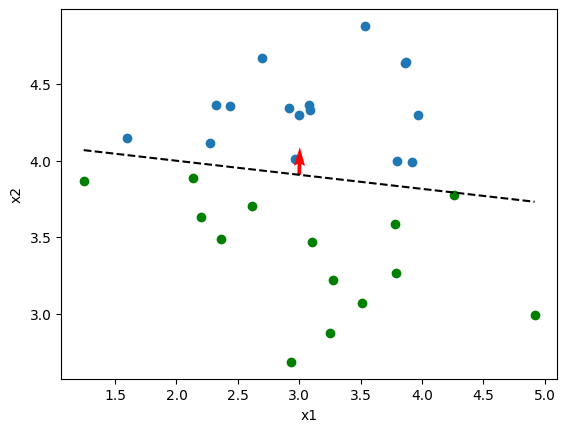

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean = [3, 4]
cov = [[0.6,0],[0,0.6]]
x, y = np.random.multivariate_normal(mean, cov, 30).T

coeff = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coeff) 

plt.plot((np.min(x),np.max(x)), [poly1d_fn(np.min(x)), poly1d_fn(np.max(x))], linestyle='dashed', color='black')

plt.scatter(x[y < poly1d_fn(x)], y[y < poly1d_fn(x)], color = 'green')
plt.scatter(x[y >= poly1d_fn(x)], y[y >= poly1d_fn(x)])

plt.quiver(3,poly1d_fn(3), -coeff[0], coeff[1], color='r')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

As a toy example, consider the very simple classifier above. The weight vector (red) of the decision boundary (black), can be thought of as a feature weighting explanation: feature **x2** having a much larger weight than **x1** tells us that we can explain the classifier's decision largely with reference to feature **x2**.

The above classifier is a logistic sigmoid: for an input of $[1,x_1,x_2]$, and a weight vector $[w_0,w_1,w_2]$, the probability of blue classification is

$$ P(\text{blue}|\pmb x,\pmb w) = \frac{1}{1+ \exp{-\pmb w^T \pmb x}}$$

The red arrow corresponds to $[w1, w2]$

## Feature Subset Explanations

Feature subset explanations cut this down: they might return just the **value of x2** as the explanation for a particular point's classification. By itself, this might seem a little useless; we'd ideally want context for the value (is it high? is it low?).

This highlights that the usefulness of subset explanations often depends on the contextual knowledge of the target audience of the explanation. In the case of explaining the sentiment of a tweet using a couple of emoji, for example, this might be a good explanation if the audience agree that those emoji correspond to the classified sentiment.

Subsets are appealing because if there are too many features to be easily considered by an audience (i.e. the feature space is not human-friendly), we ideally want a way to prioritise only a few features. This is risky; often we need to make sure that the few features we pick are meaningful by themselves, otherwise we have oversimplified our explanation to the point of uselessness.

## Rule Based Explanations

Rule based explanations are like subset explanations in that they typically don't refer to every feature (unlike many feature weighting explanations), but improve on subset explanations by adding context by presenting relevant features as part of rules.

For example, a rule based explanation of the above classification boundary might be

* If **x2** < 3.8 then classification = `green`

Rule based explanations are to some extent the best of both worlds: they reduce the amount of things we have to think about to understand the explanation, but also give us a sense of what it is about a particular subset of features that lead to a particular decision by the underlying model. One criticism which could be levelled at them is that unlike weights, rules don't provide a sense of which features are more important.

## In-depth method: LIME

We now move on to **LIME**. LIME stands for **L**ocal **I**nterpretable **M**odel-Agnostic **E**xplanations. It is one of the most well-used local explanation algorithms, partly because it is straightforward to understand, and partly because it has a well-maintained library in `python`.

This section will discuss the basics of how LIME works. The first practical will give you a chance to try it for yourself. 

## In-depth method: LIME

LIME is a feature weighting explanation method: it returns a vector of feature weights to explain a black-box machine learning model. For explanations of text classification, or similar high-dimensional feature spaces, only the $K$ features with the largest weights are reported. The intuition behind LIME is as follows:

> The decisions of a black box classifier with a complex global decision boundary can be explained locally by the weights of a linear approximation to the decision boundary.

LIME involves two models: the underlying black box model $f$, which we assume we have access to (such that for any possbile input $x$ we can get $f(x)$), and the explanation model, which is fit each time a point is explained to the area local to that point. For illustrative purposes in everything that follows (and generally in practice), we assume the explanation model is a linear model, but other interpretable models would work just as well. If we used something like a decision tree as the explanation model, LIME would become a rule-based explanation model (with the decision tree splitting thresholds acting as the rules), rather than a feature weighting explanation model.

## In-depth method: LIME

>The decisions of a black box classifier with a complex global decision boundary can be explained locally by the weights of a linear approximation to the decision boundary.

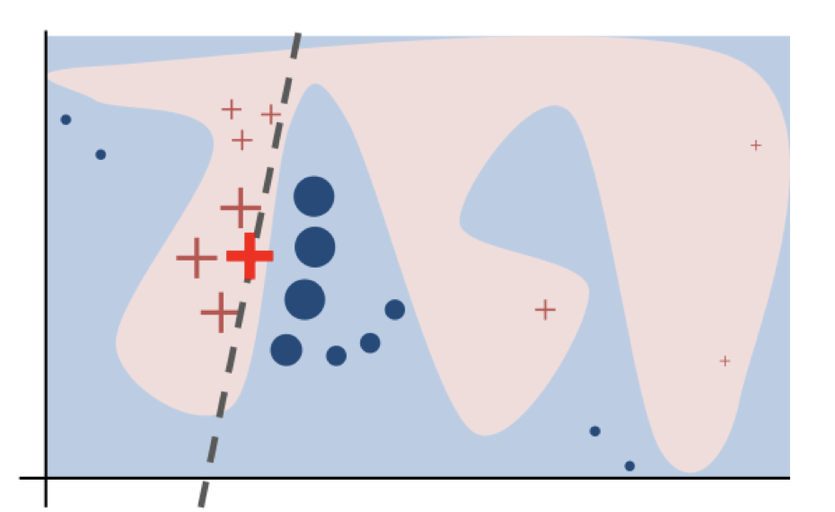

## In-depth method: LIME

The image above is from the original [LIME paper, Ribeiro et al 2016](https://arxiv.org/pdf/1602.04938.pdf). It graphically illustrates this: the complex boundary differentiates between pink and blue. We can call this $f$. 

To explain the instance indicated by the thick red cross, LIME finds a linear approximation to the local decision boundary by sampling around the point to be explained, and then using those samples as data. As in our discussion of feature weighting explanations, above, the weight vector of this boundary will then act as LIME's explanation of the instance.

This figure illustrates the intuition behind LIME. If we assume we are using a linear model as the explanation model, we sample around the point to explain, and check the classification of those samples according to the black box model. This gives us a small dataset of input-output pairs, which we then weight depending on how close they are to the point we want to explain. We then use this weighted dataset to train the linear model. 

## LIME: Algorithm

The algorithm is as follows, for some instance of interest $x$:

1. Choose an interpretable data representation of $x$, $x'$: e.g. words, super-pixels, continuous features. 
2. Choose a class of interpretable models, $G$: e.g. linear models, decision trees.
3. Choose a kernel, $\pi_x$: some measure that defines what constitutes 'local' around $x'$.
4. Sample around $x'$ by perturbing it. For example, if $x'$ is a vector of word presence/absence, zero words uniformly at random from the vector. A sample is denoted $z'$ in the interpretable data representation: in the original data representation it is $z$.
5. Find $f(z)$ for each of these samples, the classification under the black box model.
6. Weight these samples by $\pi_x$, so that samples near the instance of interest are more highly weighted.
6. Find the explanation model $g$, which minimises the difference $L(f,g;\pi_x)$ using $\{(z'_i, f(z))\}$ as data.

An important addition here is the interpretable data representation: this may not always be necessary, but if the feature space of the black box model isn't particularly informative, it can help. The easiest example of this is images: the input features to modern image processing models are generally the pixels, but these number in their thousands or millions. Providing the weights of each pixel contribution to the classification of an image wouldn't be particularly informative.

Instead, the approach LIME takes for images is to define super-pixels: large contiguous areas which share features. This has two advantages: First, if we show super pixels as explanation, they will make sense at the scale of the image, rather than at the pixel scale. Second, if we only have to perturb a super-pixel representation, we have far fewer perturbations to worry about, than if we were to try considering all possible perturbations of a million-pixel image. This speeds the algorithm up substantially.

## LIME: Maths for linear example and exponential kernel

For a simple continuous feature space, such as the toy blue/pink classification task we discussed above, we might choose an exponential kernel, 

$$\pi_x (z) = \exp(\frac{-D(x,z)^2}{\sigma^2}),$$

where $D$ is an appropriate distance function (e.g. L2 distance). As our data $x$ is simple, we can say $x' = x$. Our local model will be linear,

$$g(z') = w_g^T.z',$$

and we can use a locally weighted squared loss as $L$. The loss on our sampled data will therefore be

$$L(f,g;\pi_x) = \sum_i \pi_x(z_i) (f(z_i) - g(z'_i))^2.$$

The weights, $w_g$, which **minimise** this function can either be return directly as the explanation, or if only the $K$ most important features are of interest, $w_g$ will be used to select these.

Note that we train the linear model on the interpretable data representation.

## LIME: Advantages

* Can use the same explanation model for any underlying model: allowing for consistency of explanation to lay audiences.
* Simple to understand explanations.
* Works on tabular, image, and continuous data.
* Good implementations available.


## LIME: Disadvantages

* High variability: two adjacent points can produce quite different explanations.
* Choice of kernel substantially impacts the subsequent explanation, and is hard to justify precisely.
* Relies on the assumption that the underlying model is locally linear.
* Does not indicate the extent to which the interpretable model is a good approximation of the black-box. Indeed, “local approximation” has little meaning if we don’t specify the error made by the interpretable model.


## LIME Practical

Move to the `practical` file `lime_practical.ipynb` to apply those techniques and learn how to interpret output from LIME

## In-depth method: ANCHOR

Our second in-depth method is ANCHOR. ANCHOR is a **rule-based explanation** method by the same authors who invented LIME. As such, it has a good code support. The second practical will give you a chance to try it for yourself.

Like LIME, ANCHOR perturbs the point of interest to find neighbouring points. However, instead of weighting the points and fitting a surrogate model to them (such as the linear model described above), ANCHOR uses the points to **find the rules that best explain the local region**.

## In-depth method: ANCHOR

The ANCHOR algorithm has several components. These are:

   * A point of interest, $x$.
   * Perturbations of $x$, $z$.
   * A black-box model, $f(x)$. In our case we can think of this as a binary classifier.
   * A perturbation distribution $P(z)$, which governs how we sample around our point of interest.
   * A desired level of precision, $\tau$.
   * The ANCHOR itself, $A$, which is a list of feature predicates on $x$.


Note that we are not considering an interpretable representation $x'$ here. In theory, were we to use ANCHOR in the domain of images, or similarly complex feature spaces, we would want to do this. However, ANCHOR is currently primarily used on tabular data (and the available implementations are for tabular data).

## The parts of an ANCHOR: Predicates

A **feature predicate is a rule about a feature**. For example, if we have $A_1: x_1 \geq 3.4$, and $A2: x_2 \text{ in } [0,3]$, these are two feature predicates which combine to make an anchor:

$$ A = \{A_1, A_2\}$$

An anchor acts on a data point $x$ by checking the rules against the point; if the point satisfies all of the rules, then $A(x) = 1$. Otherwise, $A(x) = 0$.

'Predicate' here can just be considered a fancy word for rule about a feature (or features): a predicate is either true or false, depending on the value of the relevant features. 

## The parts of an ANCHOR: Coverage

The combination of predicates in an anchor defines an area of the input space where they are all true. This is called the **coverage**. For example, below I have plotted the coverage of the two predicates $A_1: x_1 \geq 3.4$, and $A2: x_2 \text{ in } [0,3]$, in red.

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1)

coverage = [Rectangle((3.4,0),1.6, 3)]
pc = PatchCollection(coverage, facecolor='r', alpha=0.5,
                         edgecolor=None)

ax.add_collection(pc)

ax.plot([3.4,3.4],[-1, 4], color='black')
ax.plot([1,5],[0, 0], color='grey')
ax.plot([1,5],[3, 3], color='grey')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

The coverage here (the red patch) continues infinitely to the right, as $A_1$ is just a lower limit on the value of $x_1$.

## The parts of an ANCHOR: Precision

The precision of an anchor, $Prec(A)$, for some point of interest $x$ is the proportion of perturbations $z$ of that point for which 

1. $A(z) = 1$
2. $f(z) = f(x)$

For example, if the dotted line is the decision boundary of the black box classifier, and the blue x is the point of interest, the proportion of the red coverage above the dotted line is the **precision of A**.

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1)

coverage = [Rectangle((3.4,0),1.6, 3)]
pc = PatchCollection(coverage, facecolor='r', alpha=0.5,
                         edgecolor=None)

ax.add_collection(pc)

ax.plot([3.4,3.4],[-1, 4], color='black')
ax.plot([1,5],[0, 0], color='grey')
ax.plot([1,5],[3, 3], color='grey')
ax.plot([1.5,4.5],[4,-1], linestyle='--', linewidth=4)
ax.scatter(4,2,marker='x',s=70,linewidth=4)

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

As in LIME, we perturb the point of interest (i.e. sample locally around it) to estimate the precision: the precision will simply be the number of sampled points which fall inside the red area (the coverage) and above the decision boundary divided by the total number of sample points which fall inside the red area.

## ANCHOR: Choosing the ANCHOR

To choose an anchor to explain a point, we then do two things:

* Of possible anchors, we only keep those which for which $prec(A) \geq \tau$, the desired level of precision.
* Of those anchors with sufficient precision, we choose the anchor with **largest** coverage.

The idea is that the set of predicates with the largest coverage around the point are the rules which best explain that point's classification: the **anchor** the classification to the point and its local perturbations.

I'm skipping a lot of the detail here: finding all possible anchors is an intractable problem, as is searching through them. The original paper uses a combination of beam search and reinforcement learning, neither of which is the topic of this course (although the paper makes for good reading, for those interested: https://homes.cs.washington.edu/~marcotcr/aaai18.pdf). Fortunately, the beauty of having the method already implemented in the ANCHOR library means we don't have to worry about the details of the algorithm.

## ANCHOR: Advantages

* Easy to understand explanations.
* The notion of coverage allows us to compare how important different explanations are.
* Model Agnostic explanations.
* Implemented code base.


## ANCHOR: Disadvantages

* Only currently implemented on Tabular data.
* Coverage may not be that meaningful in other domains.
* Runtime depends on underlying model efficiency, as every time we need to know $f(z)$ we have to make a call to the model.
* Highly complex decision boundaries may result in anchors with extremely small coverage. One way to solve this is discretization, which requires user expertise.